# Seaborn Data Visualization Tutorial - NHL Statistics

In [406]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid', {'legend.frameon':True})
sns.set(font_scale = 1.5)

import matplotlib.pyplot as plt
import re
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Import Skaters DataFrame
### Perform some select data cleaning

In [407]:
skaters = pd.read_csv('skaters.csv')
skaters = skaters[skaters.situation == 'all']
skaters.set_index('name', inplace = True)

In [408]:
df_cols = skaters.columns.tolist()
cols = [x.lower().replace('i_f_', "") for x in df_cols]
skaters.columns = cols

In [409]:
teams = skaters.team.unique()

In [410]:
central = skaters[(skaters.team == 'CHI') | (skaters.team == 'STL') | (skaters.team == 'COL') | (skaters.team == 'DAL') | (skaters.team == 'WPG') | (skaters.team == 'MIN') | (skaters.team == 'NSH')]

# Scatter Plots

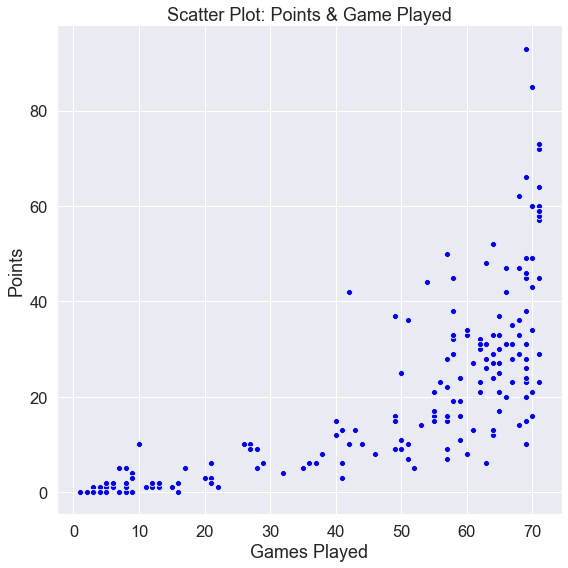

In [413]:
g = sns.relplot(data = central, x = 'games_played', y = 'points', color = 'blue', height = 8)
g.set(xlabel = 'Games Played', ylabel = 'Points', title = 'Scatter Plot: Points & Game Played')
plt.tight_layout()

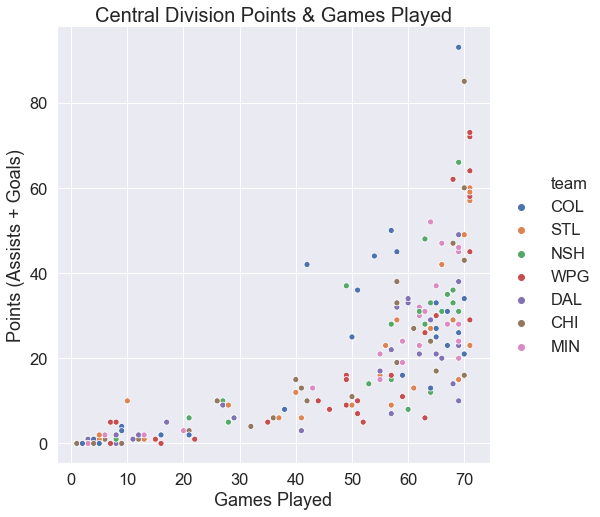

In [414]:
g = sns.relplot(data = central, x = 'games_played', y = 'points', hue = 'team')
g.fig.set_size_inches(7,7)
leg = g._legend
leg.set_bbox_to_anchor([1.2, 0.5])
g.fig.suptitle('Central Division Points & Games Played', y = 1.02, x = 0.55, size = 20)
g.set(xlabel = 'Games Played', ylabel = 'Points (Assists + Goals)')
plt.tight_layout()

In [416]:
central2 = central.copy()
central2.position = central2.position.replace(['C', 'L', 'R'], 'F')

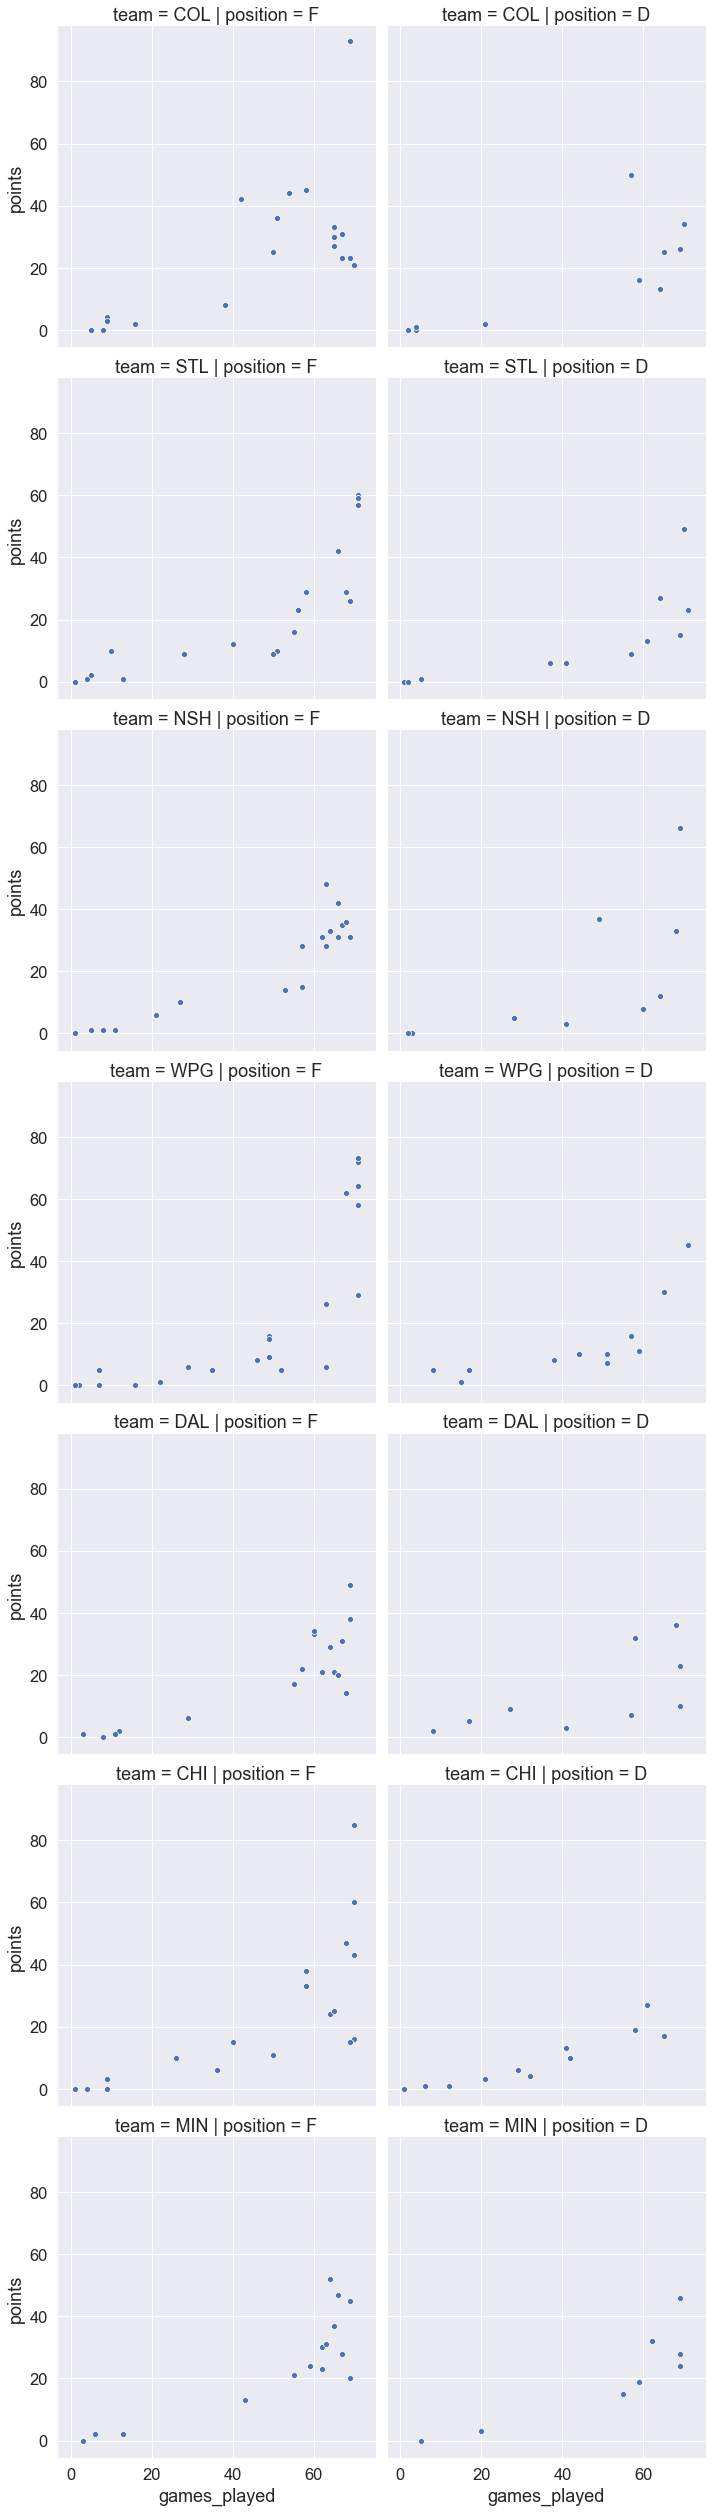

In [422]:
h = sns.relplot(data = central2, x = 'games_played', y = 'points', col = 'position', row = 'team')

# Boxplot -- sns.catplot()

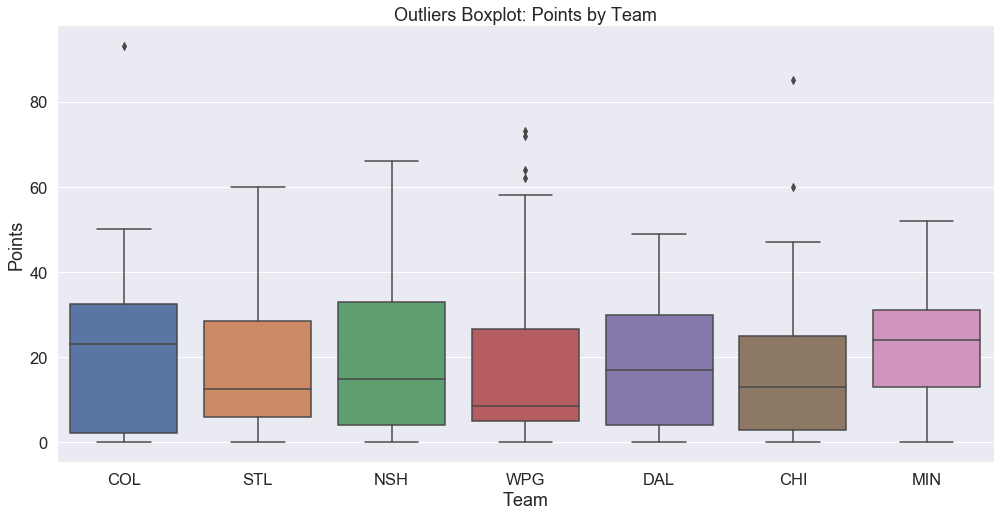

In [438]:
f = sns.catplot(data = central2, x = 'team', y = 'points', kind = 'box', height = 7, aspect = 2)
f.set(xlabel = 'Team', ylabel = 'Points', title = 'Outliers Boxplot: Points by Team');

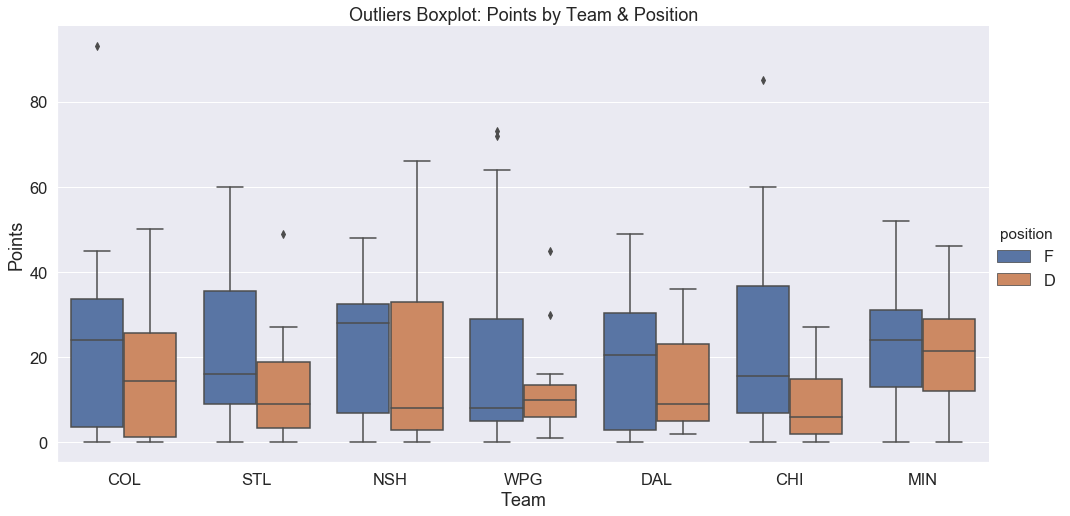

In [437]:
f2 = sns.catplot(data = central2, x = 'team', y = 'points', hue = 'position', kind = 'box', height = 7, aspect = 2)
f2.set(xlabel = 'Team', ylabel = 'Points', title = 'Outliers Boxplot: Points by Team & Position');

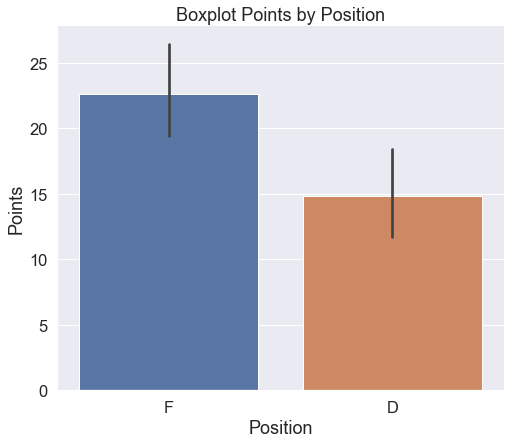

In [436]:
b = sns.catplot(data = central2, x = 'position', y = 'points', kind = 'bar', height = 6, aspect = 1.2)
b.set(xlabel = 'Position', ylabel = 'Points', title = 'Boxplot Points by Position');

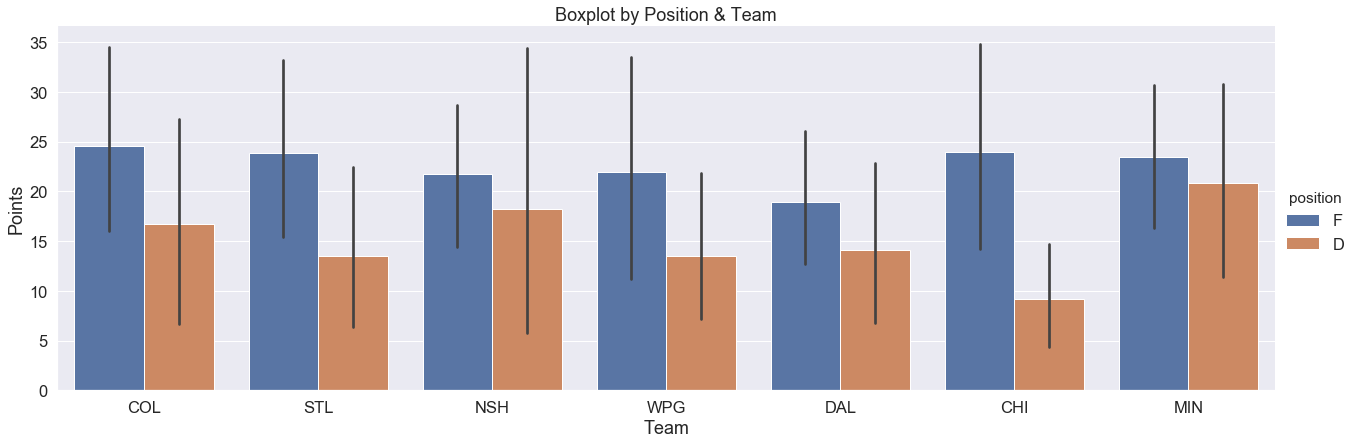

In [432]:
b2 = sns.catplot(data = central2, x = 'team', y = 'points', hue = 'position', height = 6, kind = 'bar', aspect = 3)
b2.set(xlabel = 'Team', ylabel = 'Points', title = 'Boxplot by Position & Team');

# Violin Plot

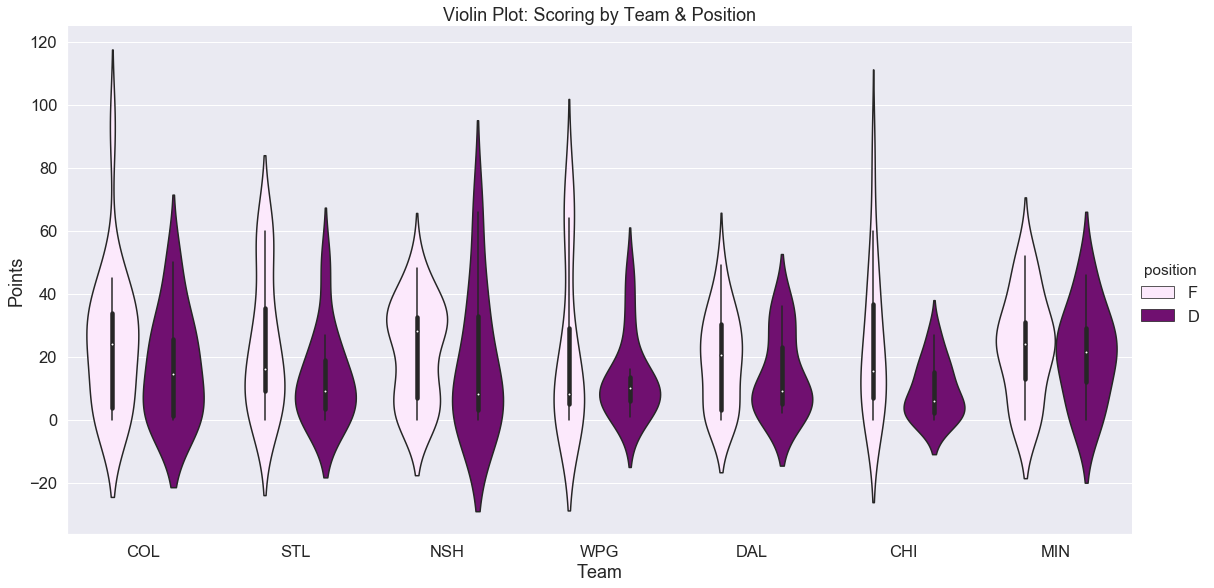

In [434]:
b = sns.catplot(x = 'team', y = 'points', kind = 'violin', data = central2, hue = 'position', height = 8, aspect = 2, color = 'purple')
b.set(xlabel = 'Team', ylabel = 'Points', title = 'Violin Plot: Scoring by Team & Position');

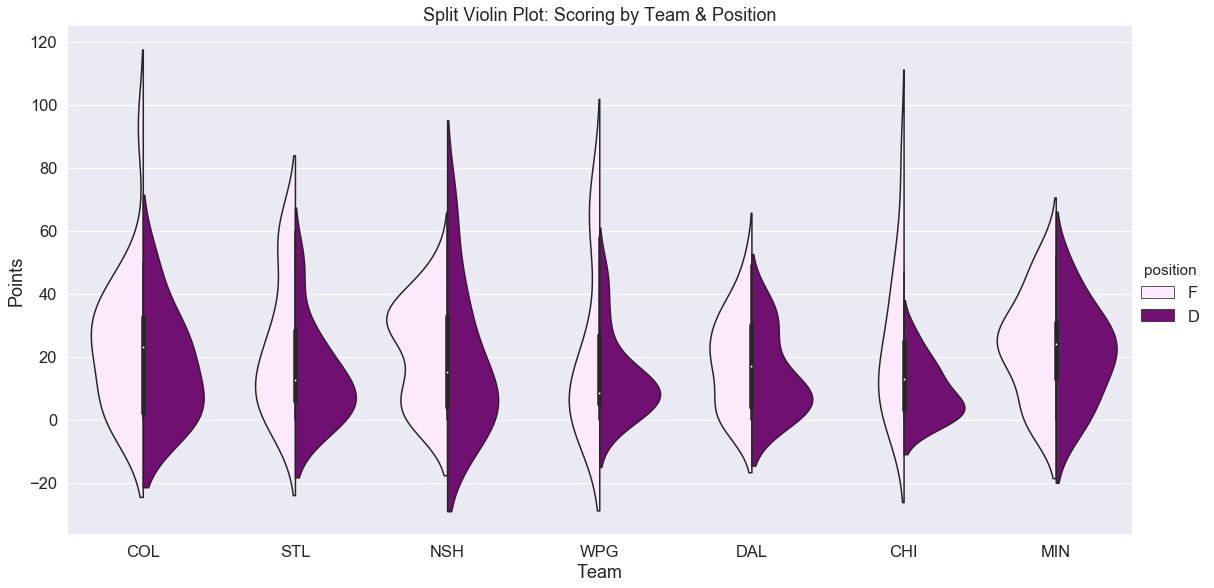

In [435]:
b = sns.catplot(x = 'team', y = 'points', kind = 'violin', data = central2, hue = 'position', height = 8, aspect = 2, color = 'purple', split = True)
b.set(xlabel = 'Team', ylabel = 'Points', title = 'Split Violin Plot: Scoring by Team & Position');

# Pointplot 

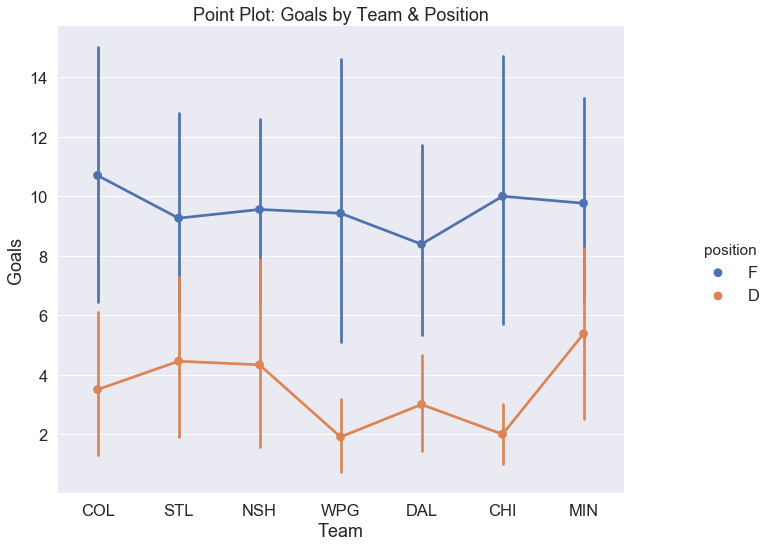

In [439]:
p = sns.catplot(x = 'team', y = 'goals', hue = 'position', kind = 'point', data = central2)
p.set(xlabel = 'Team', ylabel = 'Goals', title = 'Point Plot: Goals by Team & Position')
p.fig.set_size_inches([12,8])

# Swarm Plot 

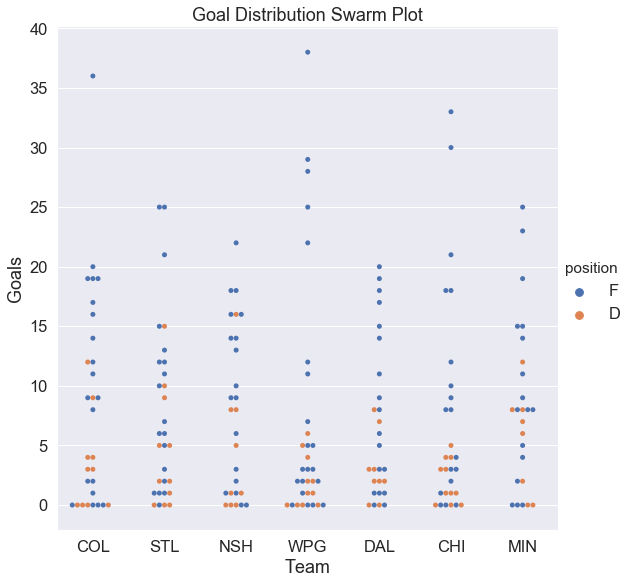

In [248]:
c = sns.catplot(x = 'team', y = 'goals', hue = 'position', kind = 'swarm', data = central2, height = 8, aspect = 1)
c.set(xlabel = 'Team', ylabel = 'Goals', title = 'Swarm Plot: Goals by ');

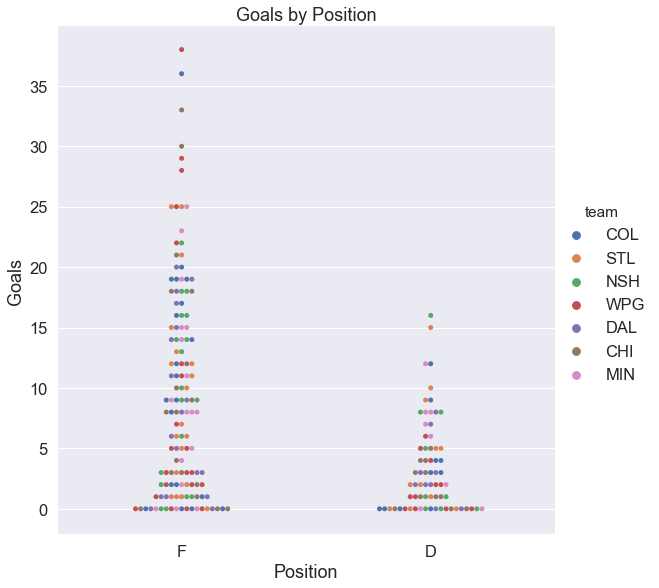

In [255]:
d = sns.catplot(x = 'position', y = 'goals', hue = 'team', kind = 'swarm', data = central2, height = 8, aspect = 1)
d.set(xlabel = 'Position', ylabel = 'Goals', title = 'Goals by Position');

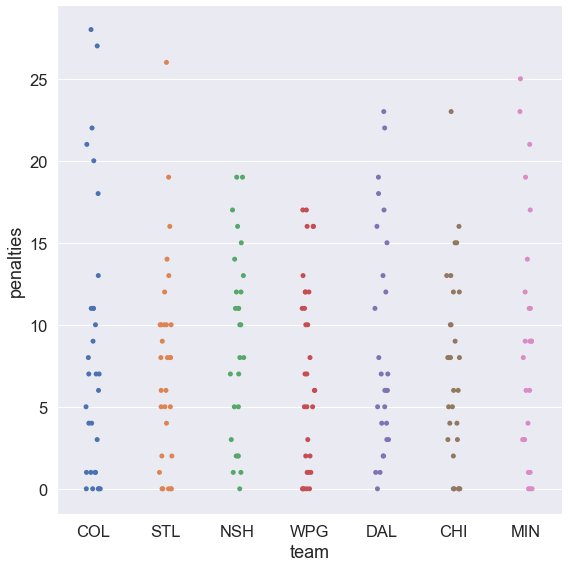

In [261]:
t = sns.catplot(data = central, y = 'penalties', x = 'team', height = 8, aspect = 1)

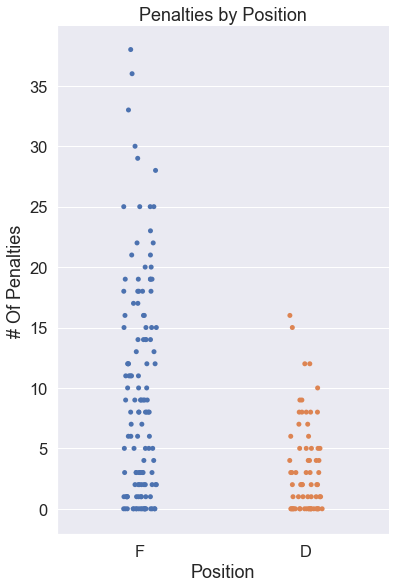

In [278]:
t = sns.catplot(data = central2, y = 'goals', x = 'position', height = 8, aspect = 0.7, jitter = True)
t.set(xlabel = 'Position', ylabel = '# Of Penalties', title = 'Penalties by Position');

# Univariate Distributions

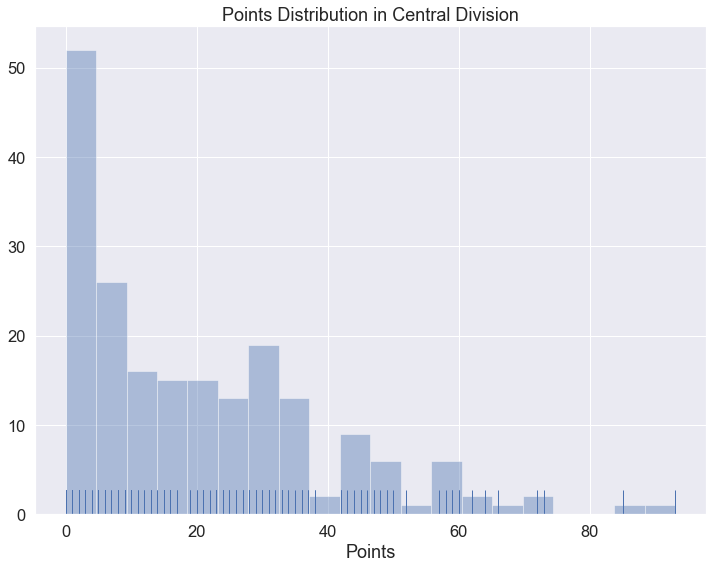

In [313]:
plt.figure(figsize = (10,8))
h = sns.distplot(central2.points, bins = 20, rug = True, kde = False)
h.set_xlabel('Points')
h.set_title('Points Distribution in Central Division')
plt.tight_layout()

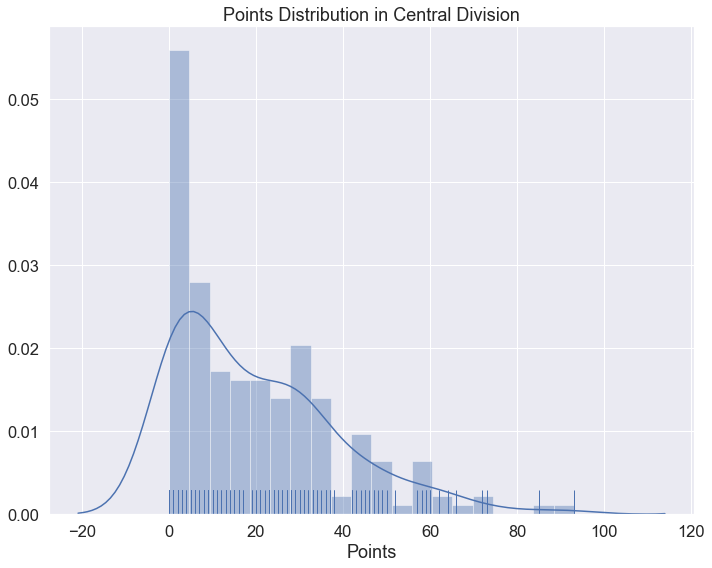

In [314]:
plt.figure(figsize = (10,8))
h = sns.distplot(central2.points, bins = 20, rug = True, kde = True)
h.set_xlabel('Points')
h.set_title('Points Distribution in Central Division')
plt.tight_layout()

# Jointplot

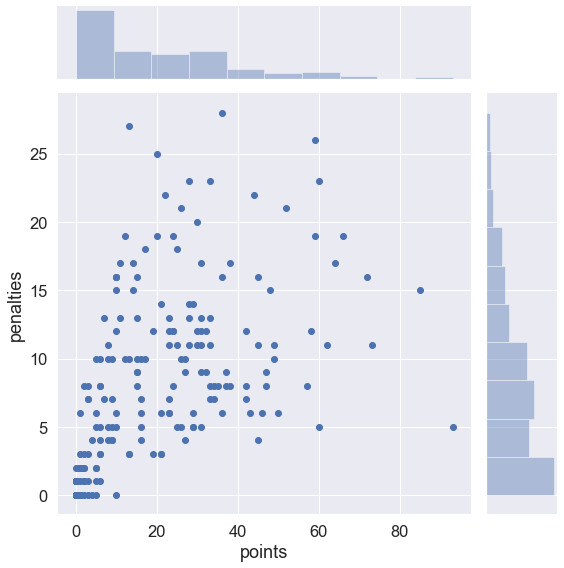

In [323]:
j = sns.jointplot(x = 'points', y = 'penalties', data = central2, height = 8)

# Hexplot

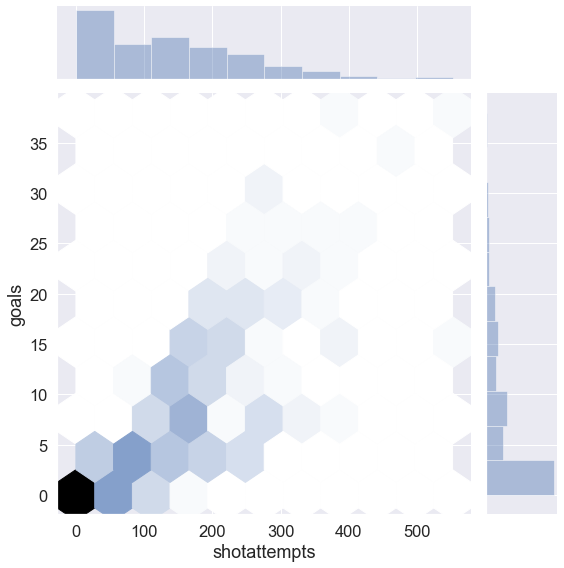

In [355]:
h = sns.jointplot(data = central2, x = 'shotattempts', y = 'goals', kind = 'hex', height = 8)

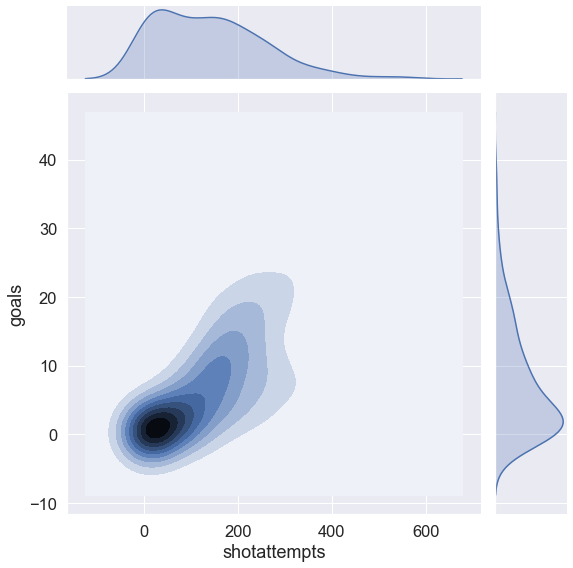

In [354]:
y = sns.jointplot(x = 'shotattempts', y = 'goals', kind = 'kde', data = central2, height = 8)

# Correlations

In [378]:
df_corr = central2[['points', 'goals', 'penalties', 'hits', 'shotsongoal', 'shotattempts','icetime']]
corr = df_corr.corr()

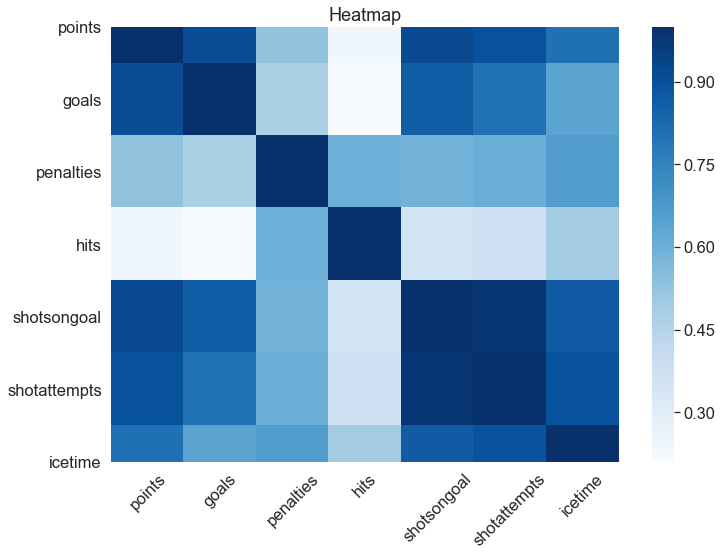

In [387]:
f, ax = plt.subplots(figsize = (12, 8))
sns.heatmap(corr, square = True, cmap = 'Blues');
plt.xticks(rotation = 45)
plt.title('Heatmap')
plt.show()

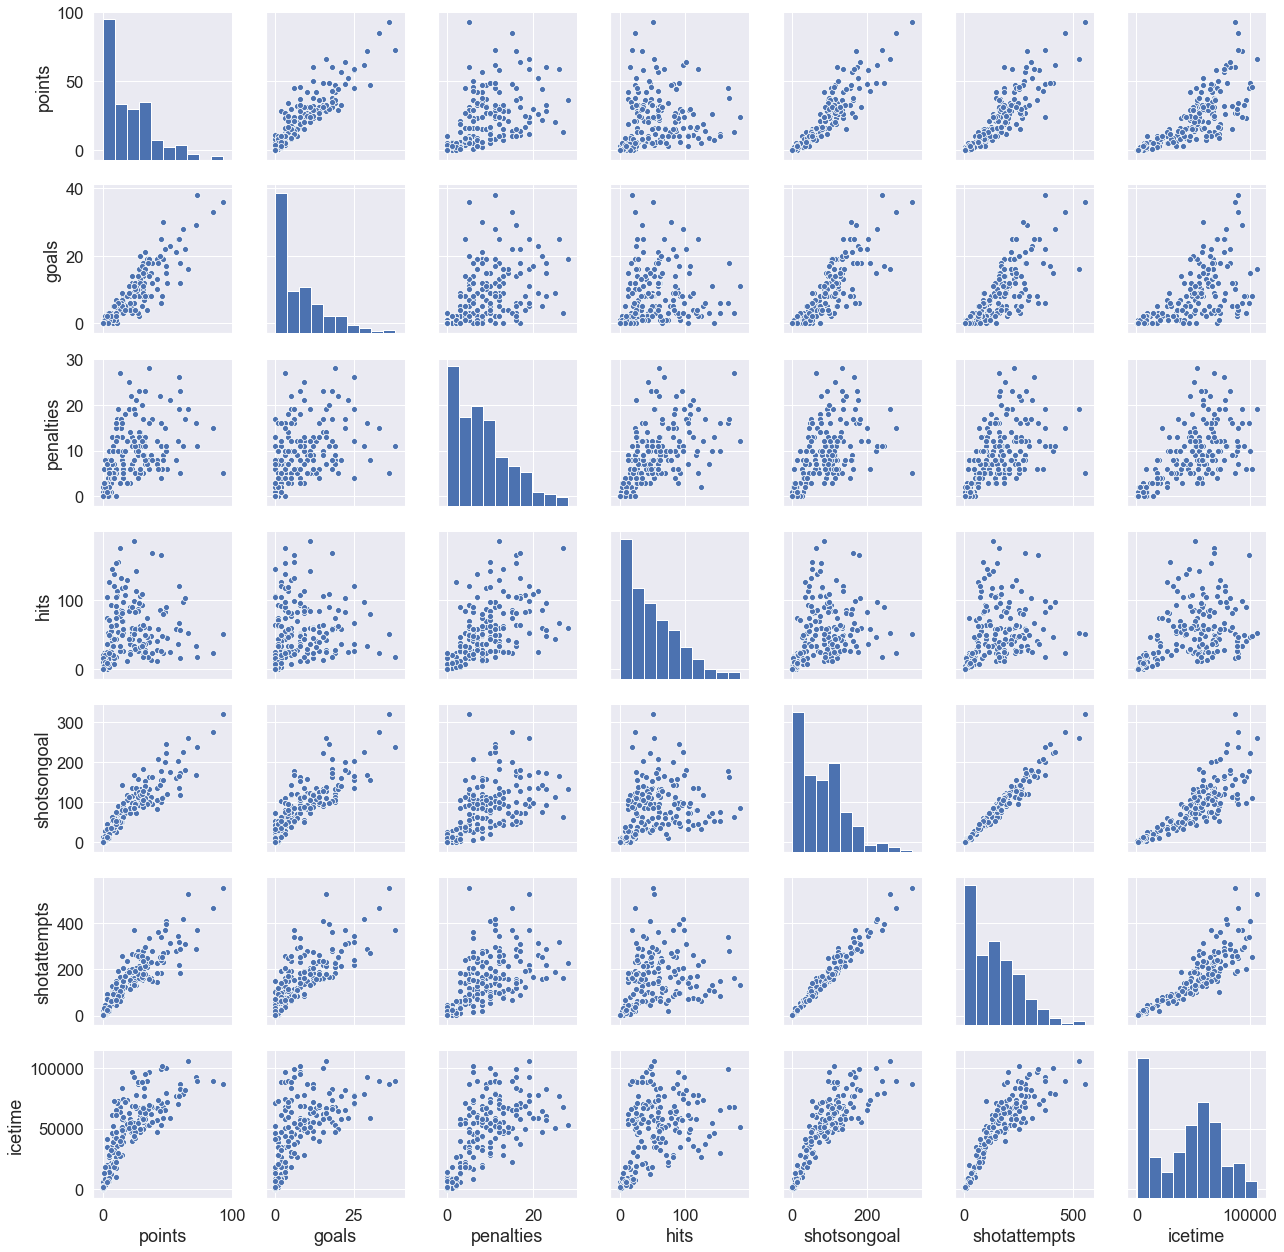

In [389]:
sns.pairplot(data = df_corr);